In [4]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import skimage.filters as filter
from scipy.signal import argrelextrema
from scipy.signal import medfilt
%matplotlib inline

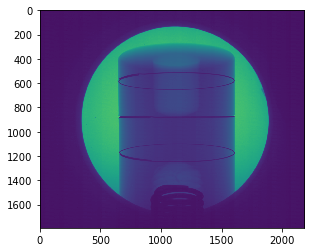

In [5]:
img=io.imread('../../data/cbct/fp200_x70_3s_5fps_60kV_150uA_00001.tif')
plt.imshow(img)

In [ ]:
#plt.figure(figsize=(10,2/3*10))

plt.subplot(321)
plt.imshow(img)
##
# Prepare
res=np.abs(filter.gaussian_filter(filter.hsobel(img),5));
res=np.clip(res,0.0,0.2)
plt.subplot(322)
plt.imshow(res)
plt.colorbar()

# Identify the left and right sides of the circles
#vsum=medfilt(np.sum(res,0),7)
vsum=np.sum(res,0)
idx = argrelextrema(vsum, np.greater)
peaks = vsum[idx]
p1=np.argmax(peaks)
peaks = np.delete(peaks,p1)
p2=np.argmax(peaks)
p2 = p2+1 if p1<p2 else p2
p1=idx[0][p1]
p2=idx[0][p2]

if p2<p1:
    p1, p2 = p2, p1

pd3 = int(np.floor((p2-p1)/3))

    
plt.subplot(323)
plt.plot(vsum)
plt.plot([p1,p1],[0 ,vsum[p1]])
plt.plot([p2,p2],[0 ,vsum[p2]])

# Find upper and lower ring parts
plt.subplot(324)
res=res[:,(p1+pd3):(p2-pd3)]
plt.plot(np.sum(res,1))

plt.subplot(325)
plt.imshow(res)
plt.show()